In [146]:
%config IPCompleter.greedy=True
%matplotlib inline
import math

import numpy as np
import seaborn as sns; sns.set();
import matplotlib.pyplot as plt
from tqdm import tqdm

from scraper import IMDBScraper

In [169]:
def pad_zeroes(matrix):
    """
    Take a jagged matrix, and convert it into square by filling all rows smaller than the longest with zeros.
    """
    lens = np.array(list(map(len, matrix)))
    mask = np.arange(lens.max()) < lens[:,None]
    output = np.zeros(mask.shape, dtype=np.float)
    output[mask] = np.concatenate(matrix)
    return output

def main():
    """
    Scrape the data for It's Always Sunny in Philadelphia and place in NxN array
    """
    iasip = IMDBScraper("tt0944947")
    ratings = []
    for season in tqdm(iasip.get_all_seasons(), desc="Retrieving data season-wise", total=iasip.latest_season):
        episodes = [np.float(episode["rating"]) for episode in season["episodes"]]
        ratings.append(episodes)
    return pad_zeroes(np.array(ratings))

ratings = main()


Retrieving data season-wise: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:08<00:00,  1.08s/it]


In [147]:
math.floor(ratings[np.nonzero(ratings)].min())

4

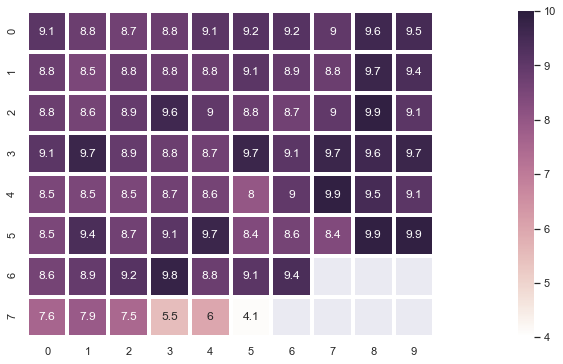

In [172]:
plt.figure(figsize=(30, 6))
mean = math.floor(np.concatenate(ratings).mean())
vmax = min(10, mean+5)
vmin = max(0, mean-5)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
ax = sns.heatmap(ratings, cmap=cmap, annot=True, square=True, linewidths=3, mask=(ratings==0), vmax=10, vmin=math.floor(ratings[np.nonzero(ratings)].min()));

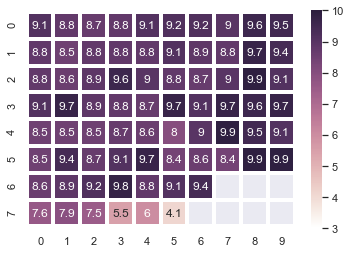

In [173]:
ax2 = sns.heatmap(ratings, cmap=cmap, annot=True, square=True, linewidths=3, mask=(ratings==0), vmax=vmax, vmin=vmin);

In [183]:
 + np.arange(1,10)[:,np.new

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])